# Libraries and versions

In [69]:
#Basic libraries
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3

#for analyse multiple features
from sklearn import __version__ as skn #version 0.24.1
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#for 3D visualization
import plotly.express as px

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'Sklearn version - {skn}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3
Sklearn version - 0.24.1


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Seaborn

In [4]:
sns.set_palette('icefire_r')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,8)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Description

**Context**

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

**Source**

Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

**Relevant Papers**

Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

url: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

### Personal target

- analyse data with vary features and search better features to create a model
- use Sklearn Feature Selection tools (PAC, TSNE, SelectKBest, etc.)
- see the performance of LightGBMClassifier and understand his params
- see the performance of CatBoostClassifier and understand his params

## Dataset

In [6]:
dataset = pd.read_csv('data.csv')
dataset

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

### information about dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

- there are 95 features to predict column *Bankrupt?*
- 2 features are int64 and seems that features are some kind of flag
- all features are financial data of companies
- there are features (like *Net Value per share*) which has "versions" (A, B, C)
- there are a space after columns names

**Is important understand the correlation between features and importance of each one to create a better model**

### Adjust columns names

In [8]:
dict_columns = {}
for column in dataset.columns:
    dict_temp = {column:column.strip()}
    dict_columns.update(dict_temp)

dataset.rename(columns=dict_columns, inplace=True)
dataset.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

### Search for missing values (one more time)

In [9]:
print(dataset.isna().sum())

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

- there are no missing values 

### Analyse flag variables (Liability-Assets Flag, Net Income Flag)

In [10]:
#Liability-Assets Flag
dataset['Liability-Assets Flag'].value_counts()

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64

In [11]:
#Net Income Flag
dataset['Net Income Flag'].value_counts()

1    6819
Name: Net Income Flag, dtype: int64

- theses features will not distinct class for predict variable; must be droped

In [12]:
dataset.drop(columns=['Liability-Assets Flag', 'Net Income Flag'], inplace=True)

### Analyse Net Value per share A, B and C

In [13]:
dataset[['Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)']]

Net Value Per Share (B)  Net Value Per Share (A)  \
0                    0.147950                 0.147950   
1                    0.182251                 0.182251   
2                    0.177911                 0.177911   
3                    0.154187                 0.154187   
4                    0.167502                 0.167502   
...                       ...                      ...   
6814                 0.175045                 0.175045   
6815                 0.181324                 0.181324   
6816                 0.269521                 0.269521   
6817                 0.213392                 0.213392   
6818                 0.220766                 0.220766   

      Net Value Per Share (C)  
0                    0.147950  
1                    0.182251  
2                    0.193713  
3                    0.154187  
4                    0.167502  
...                       ...  
6814                 0.175045  
6815                 0.181324  
6816                 0.269521  
6817                 0.213392  
6818                 0.220766  

[6819 rows x 3 columns]

In [14]:
verify_b_a = dataset['Net Value Per Share (B)'] == dataset['Net Value Per Share (A)']
verify_b_a.value_counts()

True     6759
False      60
dtype: int64

In [15]:
verify_b_c = dataset['Net Value Per Share (B)'] == dataset['Net Value Per Share (C)']
verify_b_c.value_counts()

True     6681
False     138
dtype: int64

In [16]:
verify_a_c = dataset['Net Value Per Share (A)'] == dataset['Net Value Per Share (C)']
verify_a_c.value_counts()

True     6741
False      78
dtype: int64

- these variables are almost equals and together will not help to predict Bankrupt
- Afeter analyse correlation, I will use only variable with bigger value

## EDA

### Correlation

- the first strategy is select features with most correlation with Bankruptcy

In [17]:
correlation = dataset.corr().iloc[0].sort_values()
correlation

Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets                                          -0.250161
Persistent EPS in the Last Four Seasons                   -0.219560
Retained Earnings to Total Assets                         -0.217779
Net profit before tax/Paid-in capital                     -0.207857
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Working Capital to Total Assets                           -0.193083
Net Income to Stockholder's Equity                        -0.180987
Net Value Per Share (A)                                   -0.165465
Net Value Per Share (B)                                   -0.165399
Net Value Per Share (C)                                   -0.164784
Working Capital/Equity                          

### Analyse correlation for Net Value per share A, B and C

#### Correlation

In [18]:
correlation.loc[['Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)']]

Net Value Per Share (A)   -0.165465
Net Value Per Share (B)   -0.165399
Net Value Per Share (C)   -0.164784
Name: Bankrupt?, dtype: float64

- the bets variable to use is Net Value Per Share (A) (more correlated with Bankruptcy

In [19]:
#drop columns Net Value Per Share (B) and Net Value Per Share (C)
dataset.drop(columns=['Net Value Per Share (B)', 'Net Value Per Share (C)'],
            inplace=True)

### Curret Liability to Equity

#### Correlation

In [20]:
correlation.loc[['Current Liability to Equity', 'Current Liabilities/Equity']]

Current Liability to Equity    0.153828
Current Liabilities/Equity     0.153828
Name: Bankrupt?, dtype: float64

- 'Current Liabilities/Equity' and 'Current Liability to Equity' has the same correlation
- one must be droped

In [21]:
#drop column
dataset.drop(columns=['Current Liabilities/Equity'], inplace=True)

### Choosing variables using correlation

- I will choose only variables which correlation is 0.1 for Bankrupt (in the bottom or in the top)

#### Correlation with new columns

In [22]:
correlation = dataset.corr().iloc[0].sort_values()
correlation

Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets                                          -0.250161
Persistent EPS in the Last Four Seasons                   -0.219560
Retained Earnings to Total Assets                         -0.217779
Net profit before tax/Paid-in capital                     -0.207857
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Working Capital to Total Assets                           -0.193083
Net Income to Stockholder's Equity                        -0.180987
Net Value Per Share (A)                                   -0.165465
Working Capital/Equity                                    -0.147221
Operating Profit Per Share (Yuan ¥)                       -0.142051
Operating profit/Paid-in capital                

In [23]:
#selecting variables with correlation bellow -0.1 and above 0.1
list_variables = []
count = 0
for value in range(0, len(correlation)):
    if correlation[count] <= -0.1:
        list_variables.append(correlation.index[count])
    elif correlation[count] >= 0.1:
        list_variables.append(correlation.index[count])
    else:
        pass
    count += 1

#create a new dataset
new_dataset = dataset[list_variables]
print(f'Len new_dataset{new_dataset.shape}')
new_dataset.head()

Len new_dataset(6819, 29)


Net Income to Total Assets  ROA(A) before interest and % after tax  \
0                    0.716845                                0.424389   
1                    0.795297                                0.538214   
2                    0.774670                                0.499019   
3                    0.739555                                0.451265   
4                    0.795016                                0.538432   

   ROA(B) before interest and depreciation after tax  \
0                                           0.405750   
1                                           0.516730   
2                                           0.472295   
3                                           0.457733   
4                                           0.522298   

   ROA(C) before interest and depreciation before interest  Net worth/Assets  \
0                                           0.370594                0.792424   
1                                           0.464291                0.828824   
2                                           0.426071                0.792484   
3                                           0.399844                0.848535   
4                                           0.465022                0.893491   

   Persistent EPS in the Last Four Seasons  Retained Earnings to Total Assets  \
0                                 0.169141                           0.903225   
1                                 0.208944                           0.931065   
2                                 0.180581                           0.909903   
3                                 0.193722                           0.906902   
4                                 0.212537                           0.913850   

   Net profit before tax/Paid-in capital  \
0                               0.137757   
1                               0.168962   
2                               0.148036   
3                               0.147561   
4                               0.167461   

   Per Share Net profit before tax (Yuan ¥)  Working Capital to Total Assets  \
0                                  0.138736                         0.672775   
1                                  0.169918                         0.751111   
2                                  0.142803                         0.829502   
3                                  0.148603                         0.725754   
4                                  0.168412                         0.751822   

   Net Income to Stockholder's Equity  Net Value Per Share (A)  \
0                            0.827890                 0.147950   
1                            0.839969                 0.182251   
2                            0.836774                 0.177911   
3                            0.834697                 0.154187   
4                            0.839973                 0.167502   

   Working Capital/Equity  Operating Profit Per Share (Yuan ¥)  \
0                0.721275                             0.095921   
1                0.731975                             0.093722   
2                0.742729                             0.092338   
3                0.729825                             0.077762   
4                0.732000                             0.096898   

   Operating profit/Paid-in capital  CFO to Assets  Tax rate (A)  \
0                          0.095885       0.520382           0.0   
1                          0.093743       0.567101           0.0   
2                          0.092318       0.538491           0.0   
3                          0.077727       0.604105           0.0   
4                          0.096927       0.578469           0.0   

   Cash/Total Assets  Gross Profit to Sales  Operating Gross Margin  \
0           0.004094               0.601453                0.601457   
1           0.014948               0.610237                0.610235   
2           0.000991               0.601449                0.601450   
3           0.018851      

### Correlation with new dataset

In [24]:
new_dataset.corr()

Net Income to Total Assets  \
Net Income to Total Assets                                            1.000000   
ROA(A) before interest and % after tax                                0.961552   
ROA(B) before interest and depreciation after tax                     0.912040   
ROA(C) before interest and depreciation before ...                    0.887670   
Net worth/Assets                                                      0.281422   
Persistent EPS in the Last Four Seasons                               0.691152   
Retained Earnings to Total Assets                                     0.794189   
Net profit before tax/Paid-in capital                                 0.683623   
Per Share Net profit before tax (Yuan ¥)                              0.671748   
Working Capital to Total Assets                                       0.297217   
Net Income to Stockholder's Equity                                    0.328492   
Net Value Per Share (A)                                               0.493803   
Working Capital/Equity                                                0.123817   
Operating Profit Per Share (Yuan ¥)                                   0.577846   
Operating profit/Paid-in capital                                      0.575833   
CFO to Assets                                                         0.440095   
Tax rate (A)                                                          0.231210   
Cash/Total Assets                                                     0.195652   
Gross Profit to Sales                                                 0.300146   
Operating Gross Margin                                                0.300143   
Equity to Long-term Liability                                        -0.120242   
Total expense/Assets                                                 -0.470498   
Current Liability to Equity                                          -0.150319   
Liability to Equity                                                  -0.159697   
Current Liability to Current Assets                                  -0.202751   
Borrowing dependency                                                 -0.177781   
Current Liability to Assets                                          -0.214085   
Debt ratio %                                                         -0.281422   
Bankrupt?                                                            -0.315457   

                                                    ROA(A) before interest and % after tax  \
Net Income to Total Assets                                                        0.961552   
ROA(A) before interest and % after tax                                            1.000000   
ROA(B) before interest and depreciation after tax                                 0.955741   
ROA(C) before interest and depreciation before ...                                0.940124   
Net worth/Assets                                                                  0.259972   
Persistent EPS in the Last Four Seasons                                           0.764828   
Retained Earnings to Total Assets                                                 0.718013   
Net profit before tax/Paid-in capital                                             0.758234   
Per Share Net profit before tax (Yuan ¥)                                          0.752578   
Working Capital to Total Assets                                                   0.303532   
Net Income to Stockholder's Equity                                                0.291744   
Net Value Per Share (A)                                                           0.531790   
Working Capital/Equity                                                            0.120403   
Operating Profit Per Share (Yuan ¥)                                               0.654253   
Operating profit/Paid-in capital                                                  0.651581   
CFO to Assets                                                                     0.443

- variables ROA(A), ROA(B) and ROA(C) has very positive correlation with Net Income to Total Assets which has the most negative correlation with Bankruptcy, then I will drop that variables

In [25]:
new_dataset.drop(columns=['ROA(A) before interest and % after tax', 
                          'ROA(B) before interest and depreciation after tax',
                          'ROA(C) before interest and depreciation before interest'],
                inplace=True)

In [26]:
new_dataset.shape

(6819, 26)

- there are 25 features to predict Bankruptcy. this number is a lot, but is almost 1/4 for the original dataset;
- the new selections of features will be made for Sklearn in preprocessing
- before that it is necessary analyse more the data, compare with Bankrupt variable

## Exploratory analysis

### Describe

In [27]:
new_dataset.describe()

Net Income to Total Assets  Net worth/Assets  \
count                 6819.000000       6819.000000   
mean                     0.807760          0.886823   
std                      0.040332          0.053920   
min                      0.000000          0.000000   
25%                      0.796750          0.851196   
50%                      0.810619          0.888593   
75%                      0.826455          0.927109   
max                      1.000000          1.000000   

       Persistent EPS in the Last Four Seasons  \
count                              6819.000000   
mean                                  0.228813   
std                                   0.033263   
min                                   0.000000   
25%                                   0.214711   
50%                                   0.224544   
75%                                   0.238820   
max                                   1.000000   

       Retained Earnings to Total Assets  \
count                        6819.000000   
mean                            0.934733   
std                             0.025564   
min                             0.000000   
25%                             0.931097   
50%                             0.937672   
75%                             0.944811   
max                             1.000000   

       Net profit before tax/Paid-in capital  \
count                            6819.000000   
mean                                0.182715   
std                                 0.030785   
min                                 0.000000   
25%                                 0.169376   
50%                                 0.178456   
75%                                 0.191607   
max                                 1.000000   

       Per Share Net profit before tax (Yuan ¥)  \
count                               6819.000000   
mean                                   0.184361   
std                                    0.033180   
min                                    0.000000   
25%                                    0.170370   
50%                                    0.179709   
75%                                    0.193493   
max                                    1.000000   

       Working Capital to Total Assets  Net Income to Stockholder's Equity  \
count                      6819.000000                         6819.000000   
mean                          0.814125                            0.840402   
std                           0.059054                            0.014523   
min                           0.000000                            0.000000   
25%                           0.774309                            0.840115   
50%                           0.810275                            0.841179   
75%                           0.850383                            0.842357   
max                           1.000000                            1.000000   

       Net Value Per Share (A)  Working Capital/Equity  \
count              6819.000000             6819.000000   
mean                  0.190633                0.735817   
std                   0.033474                0.011678   
min                   0.000000                0.000000   
25%                   0.173613                0.733612   
50%                   0.184400                0.736013   
75%                   0.199570                0.738560   
max                   1.000000                1.000000   

       Operating Profit Per Share (Yuan ¥)  Operating profit/Paid-in capital  \
count                          6819.000000                       6819.000000   
mean                              0.109091                          0.108977   
std                               0.027942                          0.027782   
min                               0.000000                          0.000000   
25%                               0.096083                          0.096105   
50%                               0.104226                      

- values for all variables are between 0 and 1, then there is no necessary normalize data

In [28]:
#rename variable Bankrupt? for Bankrupt
new_dataset.rename(columns={'Bankrupt?':'Bankrupt'}, inplace=True)

#### Compare mean for Bankrupt

In [29]:
bank_1 = new_dataset.query('Bankrupt == 1').describe().loc['mean']
bank_0 = new_dataset.query('Bankrupt == 0').describe().loc['mean']

bank = pd.DataFrame(data={
    'Bankrupt = 1': bank_1,
    'Bankrupt = 0': bank_0,
})
bank['Difference'] = bank['Bankrupt = 1'] - bank['Bankrupt = 0']
bank

Bankrupt = 1  Bankrupt = 0  \
Net Income to Total Assets                    0.738083      0.810083   
Net worth/Assets                              0.812953      0.889286   
Persistent EPS in the Last Four Seasons       0.188818      0.230146   
Retained Earnings to Total Assets             0.904244      0.935749   
Net profit before tax/Paid-in capital         0.147672      0.183883   
Per Share Net profit before tax (Yuan ¥)      0.147765      0.185581   
Working Capital to Total Assets               0.751681      0.816207   
Net Income to Stockholder's Equity            0.826008      0.840882   
Net Value Per Share (A)                       0.160301      0.191644   
Working Capital/Equity                        0.726401      0.736130   
Operating Profit Per Share (Yuan ¥)           0.087354      0.109815   
Operating profit/Paid-in capital              0.087507      0.109692   
CFO to Assets                                 0.556412      0.594649   
Tax rate (A)                                  0.031690      0.117778   
Cash/Total Assets                             0.047736      0.126640   
Gross Profit to Sales                         0.598669      0.608256   
Operating Gross Margin                        0.598670      0.608257   
Equity to Long-term Liability                 0.130512      0.115149   
Total expense/Assets                          0.049858      0.028495   
Current Liability to Equity                   0.342772      0.331031   
Liability to Equity                           0.293578      0.279925   
Current Liability to Current Assets           0.060443      0.030542   
Borrowing dependency                          0.390400      0.374129   
Current Liability to Assets                   0.144238      0.088887   
Debt ratio %                                  0.187047      0.110714   
Bankrupt                                      1.000000      0.000000   

                                          Difference  
Net Income to Total Assets                 -0.072000  
Net worth/Assets                           -0.076333  
Persistent EPS in the Last Four Seasons    -0.041328  
Retained Earnings to Total Assets          -0.031506  
Net profit before tax/Paid-in capital      -0.036211  
Per Share Net profit before tax (Yuan ¥)   -0.037815  
Working Capital to Total Assets            -0.064526  
Net Income to Stockholder's Equity         -0.014874  
Net Value Per Share (A)                    -0.031343  
Working Capital/Equity                     -0.009729  
Operating Profit Per Share (Yuan ¥)        -0.022462  
Operating profit/Paid-in capital           -0.022185  
CFO to Assets                              -0.038237  
Tax rate (A)                               -0.086088  
Cash/Total Assets                          -0.078904  
Gross Profit to Sales                      -0.009587  
Operating Gross Margin                     -0.009587  
Equity to Long-term Liability               0.015363  
Total expense/Assets                        0.021363  
Current Liability to Equity                 0.011741  
Liability to Equity                         0.013653  
Current Liability to Current Assets         0.029901  
Borrowing dependency                        0.016271  
Current Liability to Assets                 0.055351  
Debt ratio %                                0.076333  
Bankrupt                                    1.000000

- in "positive" variables (Revenue, Profit, etc) bankruptcy companhies has less mean, otherwise in "negative" variables (Debt, Borrow, etc.) the mean for theses companies is bigger then other type

### Reduce variables with PCA and TSNE

#### X and y

In [30]:
X = new_dataset.drop(columns=['Bankrupt'])
y = new_dataset['Bankrupt']

#### PCA

##### 2 dimentions

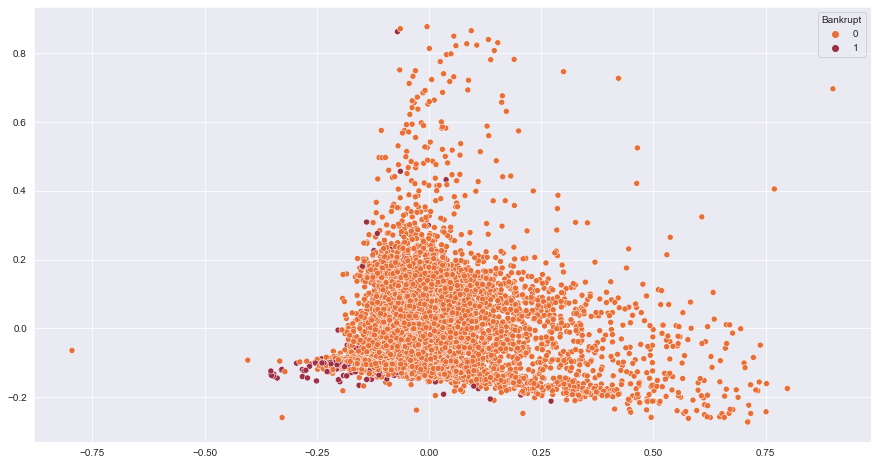

In [31]:
#reduce PCA for 2 dimentions
pca = PCA(n_components=2, random_state=666)
X_pca = pca.fit_transform(X)

#graphic
graph1 = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, hue_order=[0,1])
configuration(graph1)

##### 3 dimentions

In [32]:
#reduce PCA for 2 dimentions
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pca.fit_transform(X)

#graphic
fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,2], z=X_pca[:,2],
              color=y)
fig.show()

#### TSNE

##### 2 dimentions

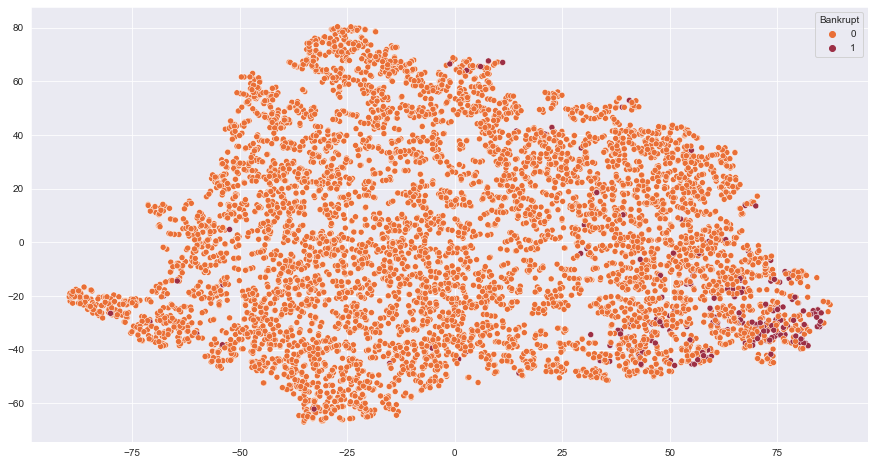

In [33]:
#reduce TSNE in 2 dimentions
tsne = TSNE(n_components=2, random_state=666)
X_tsne = tsne.fit_transform(X)

#graphic
graph1 = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, hue_order=[0,1])
configuration(graph1)

##### 3 dimentions

In [34]:
#reduce TSNE 3 dimentions
tsne = TSNE(n_components=3, random_state=666)
X_tsne = tsne.fit_transform(X)

#Graphic
fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,2], z=X_tsne[:,2], color=y)
fig.show()

- there are apparently similarities in the data that demonstrate a pattern between companies that go bankrupt and those that don't
- the third dimention shows a linear dispersion of variables, but there is no waranty that is really true; it's only one way to see how is the pattern of the data with 3 dimentions reduce

### See what looks a plot with most positive and negative correlation

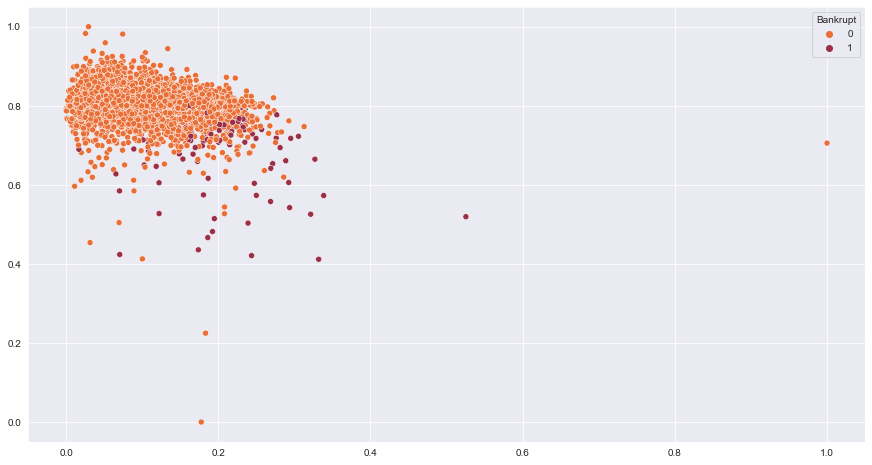

In [36]:
#most negative correlation
new_dataset['Net Income to Total Assets']

#most positive correlation
new_dataset['Debt ratio %']

graph3 = sns.scatterplot(data=new_dataset, x='Debt ratio %', y='Net Income to Total Assets',
                         hue='Bankrupt', hue_order=[0,1])
configuration(graph3)

- look for this graphic I thing the same opinion above
- let's reduce more the variables and create a model

### Compare features with dependent variables

In [37]:
print(f'Number of current features is {new_dataset.shape[1] - 1}')

Number of current features is 25


#### See how each pattern of feature with Bankrupt 

In [38]:
#generate a graphic

#sns.pairplot(data=new_dataset)

#the visualization was saved in image file

http://localhost:8888/view/OneDrive/Documentos/Jefferson%20(PC)/Projetos%20Data%20Science/Kaggle/Company%20Bankruptcy%20Prediction/pair_plot.png

- I see some variables which will not be good to distinct the companies bankrupt because there are some patterns (before drop all it is necessary check correlarion again)
 
 **Variables:** Net Worth/Assets, Working Capital to Total Assets, Working Capital/Equity, Total Expense/Assets, Current Liability to Assets and Debt ratio %
 
 
- Some variables are equal distribution for Bankrupt variable (drop one of them):

 **Variables:** Gross Profit to Sales and Operating Gross Margin

In [48]:
new_dataset.corr().loc['Bankrupt'][['Net worth/Assets', 'Working Capital to Total Assets',
                                    'Working Capital/Equity', 'Total expense/Assets',
                                    'Current Liability to Assets', 'Debt ratio %', 
                                    'Gross Profit to Sales', 'Operating Gross Margin']]

Net worth/Assets                  -0.250161
Working Capital to Total Assets   -0.193083
Working Capital/Equity            -0.147221
Total expense/Assets               0.139049
Current Liability to Assets        0.194494
Debt ratio %                       0.250161
Gross Profit to Sales             -0.100044
Operating Gross Margin            -0.100043
Name: Bankrupt, dtype: float64

- My solution is choose variables with correlation above 0.15 (positive and negative) for same patterns and drop Operating Gross Margis

In [78]:
new_dataset_2 = new_dataset.drop(columns=['Working Capital/Equity', 'Total expense/Assets', 'Operating Gross Margin'])
new_dataset_2.shape

(6819, 23)

- now it is time to reduce more variables to engenering model

### Save new data

In [79]:
new_dataset_2.to_csv('new_data.csv', index=False)